<a href="https://colab.research.google.com/github/datacommonsorg/api-python/blob/master/notebooks/intro_data_science/Data_Commons_For_Data_Science_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Copyright 2022 Google LLC.
SPDX-License-Identifier: Apache-2.0

# Tutorial: Data Science with the Data Commons API

Welcome! This tutorial will introduce the core ideas and workflow you need to get started using Data Commons for data science applications. In particular, we will focus on introducing the Python and Pandas Data Commons APIs.

This tutorial will cover:
* The power of Data Commons
* Key terminology
* The standard workflow
* Some examples to get you started

# Why Use Data Commons?

There is a substantial amount of publically available data, but this data can be difficult to use. Although the data is open, using it to answer specific questions often involves tedious ‘foraging’ — finding the data, cleaning the data, reconciling different formats and schemas, figuring out how to merge data about the same entity from different sources, etc. This error prone and tedious process is repeated, once (or more) by each organization.

Data Commons is an attempt to ameliorate some of this tedium by doing this once, on a large scale and providing cloud accessible APIs to the cleaned, normalized and joined data. Using the API, we can easily explore and analyze data across different datasets without the need for data cleaning or joining.

**The Knowledge Graph**

Data Commons provides an open knowledge repository that combines data from public datasets into one large knowledge-graph. For example, here are some statements contained in the graph:

* [Santa Clara County](https://browser.datacommons.org/kg?dcid=geoId/06085) is contained in the [State of California](https://browser.datacommons.org/kg?dcid=geoId/06)
* The latitude of [Berkeley, CA](https://browser.datacommons.org/kg?dcid=geoId/0606000) is 37.8703
* [The population of Maryland](https://browser.datacommons.org/kg?dcid=dc/p/psjx4xy30nws1) was [6,003,435 in 2018](https://browser.datacommons.org/kg?dcid=dc%2Fo%2Fx1tlfg4ll9yr9).

In the graph, [*entities*](https://en.wikipedia.org/wiki/Entity) like [Santa Clara County](https://browser.datacommons.org/kg?dcid=geoId/06085) are represented by nodes. Every node has a type corresponding to what the node represents. For example, [California](https://browser.datacommons.org/kg?dcid=geoId/06) is a [State](https://schema.org/State). *Relations* between entities are represented by edges between these nodes. For example, the statement "Santa Clara County is contained in the State of California" is represented in the graph as two nodes: "Santa Clara County" and "California" with an edge labeled "[containedInPlace](https://schema.org/containedInPlace)" pointing from Santa Clara to California. Data Commons closely follows the [Schema.org data model](https://schema.org/docs/datamodel.html) and leverages Schema.org schema to provide a common set of types and properties.







# Useful Links

Some useful references for Data Commons:

* [Main API Documentation](https://docs.datacommons.org/api/)

* [API Tutorials](https://docs.datacommons.org/tutorials/)

* [Graph Browswer](https://datacommons.org/browser/) Tool for manually stepping through the knowledge graph

And some nice visualization tools:

* [Places Explorer](https://datacommons.org/place) Lots of plots and charts summarizing data available for particular places.

* [Timelines Explorer](https://datacommons.org/tools/timeline) Explore how statistical variables change across time.

* [Scatter Plot Explorer](https://datacommons.org/tools/scatter) Plot any two statistical variables against each other.

* [Map Explorer](https://datacommons.org/tools/map) Explore how statistics vary across geographic regions (e.g. states or counties)

# Installing the Data Commons API
The Data Commons API does not ship natively with most Python installations. Thus, we need to install the APIs manually. Install the Data Commons Python and Pandas APIs using [`pip`](https://pip.pypa.io/en/stable/). In this colab, you can do this by running the following lines of code:

In [1]:
!pip install datacommons --upgrade --quiet
!pip install datacommons_pandas --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 829.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.1 MB/s eta 0:00:00


If you want to run the Data Commons API locally on your own machine, first [make sure you have Python installed](https://wiki.python.org/moin/BeginnersGuide/Download). Then, copy/paste and run the following lines in your terminal or command-line.

```
pip install datacommons --upgrade
pip install datacommons_pandas --upgrade
```

# Importing the Data Commons API

After installation, the Data Commons API can be imported using the lines of code below:

In [2]:
import datacommons
import datacommons_pandas

# Terms You Should Know

### DCIDs
The **`dcid`** (Data Commons identifier) is a unique identifier assigned to each entity in the knowledge graph. With this identifier, you will be able to search for and query information on the given entity in ways that we will discuss later.


### Statistical Variables (StatVars)
A **statistical variable** is any type of metric, statistic, or measure that can be measured at a place and time. Examples include median income of persons older than 16, number of female high school graduates aged 18 to 24, unemployment rate, or percentage of persons with diabetes. Statistial variables are also represented as nodes in the knowledge graph, and have their own entries in the graph browser.


# General Workflow for Data Science Applications

## 1) Get DCIDs of Interest
The first thing we need is to set the scope of our analysis, by combining a list of DCIDs of all the entities we wish to analyze. There are a number of ways to do this.

**Method A: Look for the DCIDs in the Graph Browser**

The first method is just to look up the entities you are interested in using the [graph browser](https://datacommons.org/browser/), and manually compile a list of DCIDs. For example, if I were interested in looking at data available for the cities of [San Francisco](https://datacommons.org/browser/geoId/0667000), [Oakland](https://datacommons.org/browser/geoId/0653000), and [Los Angeles](https://datacommons.org/browser/geoId/0644000), I would look up their pages in the graph browser to find their dcids, end up with a list that looks something like this:

In [3]:
dcids = ["geoId/0667000",  # San Francisco
         "geoId/065300",   # Oakland
         "geoId/0644000"]  # Los Angeles

**Method B: Use `get_places_in()`**

Oftentimes, we want to analyze a large cohort of places (e.g. "all cities in California", or "all states in the US"). Instead of finding the dcid for each location manually, we can use the `get_places_in()` method to query for dcids all at once.

For more details on how the method works, take a look at [the documentation page for `get_places_in()`](https://docs.datacommons.org/api/python/place_in.html)

For example, if I wanted the dcids for all counties in California, I would use the following lines of code:

In [4]:
dcid_of_california = "geoId/06"
dcids = datacommons.get_places_in([dcid_of_california], "County")[dcid_of_california]

**Method C: Use a CohortSet**

Data Commons also provides sets of pregrouped entities for convenience, which you can use. For example, the [CDC500](https://datacommons.org/browser/CDC500_City) CohortSet includes the CDC's list of the United States' 500 largest cities.

For a full list of available CohortSets, take a look at the [Graph Browser page for CohortSet](https://datacommons.org/browser/CohortSet). Available CohortSets are listed under "In Arcs"

To use the CDC500 CohortSet, we can use the code below:

In [5]:
dcids = datacommons.get_property_values(["CDC500_City"],
                                             "member",
                                             limit=500)["CDC500_City"]

## 2) Get StatVars of Interest
Similar to collecting a list of dcids, we also need a list of all the statistical variables we are interested in.

A complete list of Statistical Variables can be found [here](https://docs.datacommons.org/statistical_variables.html).

However, note that data for statistical variables may not be available for all places/entities. To check if a statistical variable is available for an entity, look at the bottom of the graph browser page for that entity for a list of the statistical variables available for that entity.

Examples of some statistical variables are shown below:

In [6]:
stat_vars_to_query = ["CumulativeCount_MedicalTest_ConditionCOVID_19_Positive",
                      "Count_Person",
                      "Median_Income_Person",
                      "Percent_Person_Obesity",
                      "Amount_Emissions_CarbonDioxide_PerCapita"
                      ]

## 3) Build Data Frame

### Use Data Commons API

Data Commons provides a `build_multivariate_dataframe()` method that returns data as a Pandas data frame.

For more on how the method works, take a look at the [`build_multivariate_dataframe()` documentation page]()

_Note:_ If data is not availabe for a particular StatVar and entity, the method will return NaN for that entry. If a StatVar is not available for any of the dcids, that column will be omitted.

In [7]:
df = datacommons_pandas.build_multivariate_dataframe(dcids,stat_vars_to_query)
display(df)

,Percent_Person_Obesity,Count_Person,Median_Income_Person
place,,,
geoId/0107000,44.9,200431,25660
geoId/0135896,32.5,91995,51216
geoId/0137000,43.7,215025,36000
geoId/0150000,41.3,186316,29293
geoId/0151000,37.9,199819,29468
...,...,...,...
geoId/5548000,27.2,268516,42068
geoId/5553000,40.4,573299,30151
geoId/5566000,39.7,77453,33079


Further data cleaning or joining is usually not necessary, but you may choose to further process your data frame for better readability or to better suit your particular data science task.

Because the Data Commons API returns a Pandas Dataframe, you are free to use any functions found in [Pandas' Documentation](https://pandas.pydata.org/docs/reference/frame.html) to edit your dataframe.

### (Optional) Make Row Names More Readable
The dataframe returned indexes rows using DCIDs, but you can add a column of human readable names for better readability. The code below adds a column containing the human readable names corresponding to each dcid.

In [8]:
df.insert(0, 'name', df.index.map(datacommons.get_property_values(df.index, 'name')).str[0])
display(df)

,name,Percent_Person_Obesity,Count_Person,Median_Income_Person
place,,,,
geoId/0107000,Birmingham,44.9,200431,25660
geoId/0135896,Hoover,32.5,91995,51216
geoId/0137000,Huntsville,43.7,215025,36000
geoId/0150000,Mobile,41.3,186316,29293
geoId/0151000,Montgomery,37.9,199819,29468
...,...,...,...,...
geoId/5548000,Madison,27.2,268516,42068
geoId/5553000,Milwaukee,40.4,573299,30151
geoId/5566000,Racine,39.7,77453,33079


### (Optional) Saving Dataframes to CSVs
If you'd like, you can save your generated Dataframe to a CSV to save and reload later.

To do this, use [Pandas' `DataFrame.to_csv()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html).



In [ ]:
df.to_csv("path/to/save/location.csv")

There are also premade CSVs available for full download from the Data Commons website, which can be found on the [CSV Bulk Download page](https://docs.datacommons.org/csv_download.html.)

## 4) Analayze Data Frame

Now that you have a data frame, you are free to use your preferred data science libraries for analysis. The sky is the limit!

To give you some ideas, we've provided some examples below of some analyses using data from Data Commons.

### Example 1: Correlation Plots
Let's analyze how different statistical variables correlate with one another.

In particular, using the CDC500 cohort set, let's look at the relationship between median income, physical inactivity, sleep, blood pressure, mental health, cholesterol, and obesity.

In [10]:
# libraries we'll use for the visualizations
import matplotlib.pyplot as plt

!pip install heatmapz --upgrade --quiet
from heatmap import heatmap, corrplot

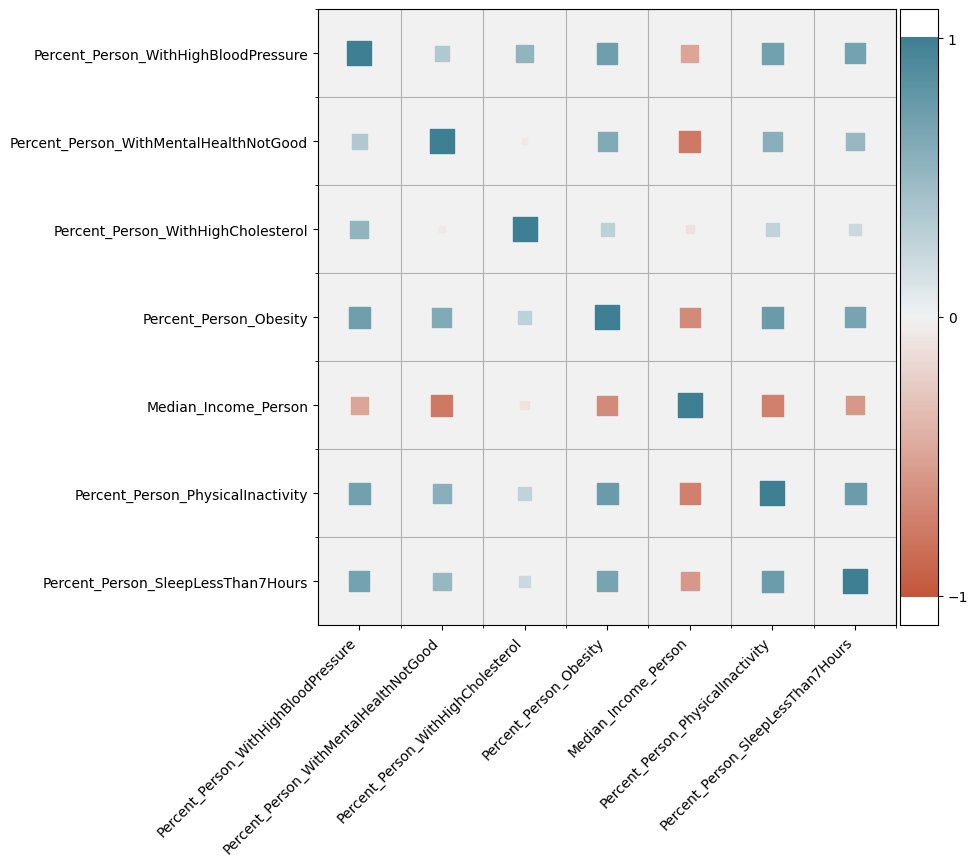

In [11]:
# List of DCIDs
# This is using the CDC500 CohortSet
dcids = datacommons.get_property_values(["CDC500_City"], "member", limit=500)["CDC500_City"]

# List of StatVars
stat_vars_to_query = [
                      "Median_Income_Person",
                      "Percent_Person_PhysicalInactivity",
                      "Percent_Person_SleepLessThan7Hours",
                      "Percent_Person_WithHighBloodPressure",
                      "Percent_Person_WithMentalHealthNotGood",
                      "Percent_Person_WithHighCholesterol",
                      "Percent_Person_Obesity"

]

# Build Data Frame
df = datacommons_pandas.build_multivariate_dataframe(dcids, stat_vars_to_query)

# Generate a correlation matrix plot
# We'll use the heatmapz package to draw a nice one.
plt.figure(figsize=(8, 8))
corrplot(df.corr(), size_scale=300);

### Example 2: Regression Analysis

This time, we'll keep the scope of our analysis to counties in California. Let's analyze the relationship between population and Covid-19 case numbers.

In [12]:
# libraries we'll use for models and the visualizations
import matplotlib.pyplot as plt
import seaborn as sns

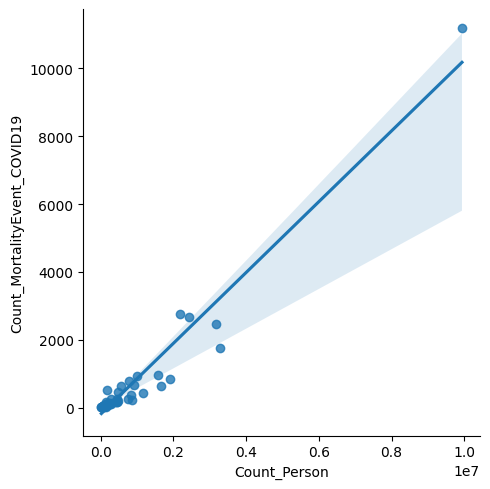

In [13]:
# List of DCIDs
# This is all counties in California
dcids = datacommons.get_places_in(["geoId/06"], "County")["geoId/06"]

# List of StatVars
stat_vars_to_query = [
                      "Count_MortalityEvent_COVID19",
                      "Count_Person",

]

# Build Data Frame
df = datacommons_pandas.build_multivariate_dataframe(dcids, stat_vars_to_query)

sns.lmplot(x="Count_Person",
            y="Count_MortalityEvent_COVID19",
            data=df)

For more examples of using the Data Commons Python API, take a look at [the case studies page](https://docs.datacommons.org/tutorials/)
